In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a45b70e002b1076809c87b8e0050356ed227847911ebc936b8564e46f3a6d94e
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
!git clone https://github.com/magenta/magenta
!pip install magenta
!git clone https://github.com/tensorflow/models/  # install the TF-slim image models library

Cloning into 'magenta'...
remote: Enumerating objects: 15927, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 15927 (delta 33), reused 54 (delta 18), pack-reused 15847
Receiving objects: 100% (15927/15927), 36.48 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (12089/12089), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.5/204.5 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

Cloning into 'models'...
remote: Enumerating objects: 81917, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 81917 (delta 235), reused 344 (delta 216), pack-reused 81533
Receiving objects: 100% (81917/81917), 596.34 MiB | 25.53 MiB/s, done.
Resolving deltas: 100% (58434/58434), done.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import wget
import tarfile
import zipfile
import os
import shutil
import glob
import cv2
import io
import skimage.io

In [ ]:
os.environ['PYTHONPATH'] += ':/content/models/research/slim'

# Контрольные точки моделей

In [ ]:
wget.download("http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz")
vgg = tarfile.open('vgg_16_2016_08_28.tar.gz')
vgg.extractall()

In [ ]:
# загрузка mobilenet для начала обучения
path_mobilenet = '/content/mobilenet_ckpt/'
if not os.path.exists(path_mobilenet):
  os.makedirs(path_mobilenet)
wget.download('https://storage.googleapis.com/mobilenet_v2/checkpoints/mobilenet_v2_1.0_224.tgz')
mobile = tarfile.open('mobilenet_v2_1.0_224.tgz')
mobile.extractall(path_mobilenet)

# Обучение

In [ ]:
%cd /content/magenta/magenta/models/arbitrary_image_stylization
! python arbitrary_image_stylization_train_mobile.py \
      --batch_size=32 \
      --learning_rate=0.0001 \
      --train_steps=2500 \
      --imagenet_data_dir=/content/drive/MyDrive/SF/Project_4_Style_Transfer/tfrecords/train/ \
      --vgg_checkpoint=/content/vgg_16.ckpt \
      --mobilenet_checkpoint=/content/drive/MyDrive/SF/Project_4_Style_Transfer/train_07_03_8kplus3,5k/model.ckpt-3500 \
      --style_dataset_file=/content/drive/MyDrive/SF/Project_4_Style_Transfer/tfrecords/style/wikiart.tfrecord \
      --train_dir=/content/drive/MyDrive/SF/Project_4_Style_Transfer/train_08_03_14k \
      --random_style_image_size=True \
      --augment_style_images=True \
      --center_crop=False \
      --save_summaries_secs=3600 \
      --save_interval_secs=3600 \
      --logtostderr

/content/magenta/magenta/models/arbitrary_image_stylization
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Queue-based input pipelines have been replaced by `

In [ ]:
path_out = '/content/train_dir/'
path_in = '/content/drive/MyDrive/SF/Project_4_Style_Transfer/train_08_03_14k/'
shutil.copytree(path_out, path_in)

#Получение TFLite из последней контрольный точки обучения

In [ ]:
%cd /content/magenta/magenta/models/arbitrary_image_stylization
! python arbitrary_image_stylization_convert_tflite.py \
      --checkpoint=/content/drive/MyDrive/SF/Project_4_Style_Transfer/train_07_03_8kplus3,5k/model.ckpt-3500 \
      --imagenet_data_dir=/content/drive/MyDrive/SF/Project_4_Style_Transfer/tfrecords/train/ \
      --style_dataset_file=/content/drive/MyDrive/SF/Project_4_Style_Transfer/tfrecords/style/wikiart.tfrecord \
      --output_dir=/content/tflite \
      --logtostderr

In [ ]:
path_out = '/content/tflite/'
path_in = '/content/drive/MyDrive/SF/Project_4_Style_Transfer/tflite_11,5K/'
shutil.copytree(path_out, path_in)

# Визуализация из TFlite

In [ ]:
content_paths = glob.glob(r"/content/drive/MyDrive/SF/Project_4_Style_Transfer/images for example/*.JPEG")
style_paths = glob.glob(r"/content/drive/MyDrive/SF/Project_4_Style_Transfer/images for example/*.jpg")

In [ ]:
style_predict_path = '/content/drive/MyDrive/SF/Project_4_Style_Transfer/tflite_11,5K/style_predict.tflite'
style_transform_path = '/content/drive/MyDrive/SF/Project_4_Style_Transfer/tflite_11,5K/style_transform.tflite'

In [ ]:
img_size = 384

In [ ]:
# Функция для загрузки изображения из файла и добавления измерения
def load_img(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]

  return img

In [ ]:
# Функция для предварительной обработки
def preprocess_image(image, target_dim):
  # Изменение размера изображения до величины target_dim
  shape = tf.cast(tf.shape(image)[1:-1], tf.float32)
  short_dim = min(shape)
  scale = target_dim / short_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  image = tf.image.resize(image, new_shape)

  # Обрезка изображения
  image = tf.image.resize_with_crop_or_pad(image, target_dim, target_dim)

  return image

In [ ]:
# Функция для запуска предсказания стиля на предварительно обработанном изображении стиля
def run_style_predict(preprocessed_style_image):
  # Загрузка модели
  interpreter = tf.lite.Interpreter(model_path=style_predict_path)

  # Установка входных данных для модели
  interpreter.allocate_tensors()
  input_details = interpreter.get_input_details()
  interpreter.set_tensor(input_details[0]["index"], preprocessed_style_image)

  # Расчет style_bottleneck
  interpreter.invoke()
  style_bottleneck = interpreter.tensor(
      interpreter.get_output_details()[0]["index"]
      )()

  return style_bottleneck

In [ ]:
# Запуск преобразования стиля на предварительно обработанном изображении стиля
def run_style_transform(style_bottleneck, preprocessed_content_image):
  # Загрузка модели
  interpreter = tf.lite.Interpreter(model_path=style_transform_path)

  # Установка входных данных для модели
  input_details = interpreter.get_input_details()
  interpreter.allocate_tensors()

  interpreter.set_tensor(input_details[0]["index"], preprocessed_content_image)
  interpreter.set_tensor(input_details[1]["index"], style_bottleneck)
  interpreter.invoke()

  # Трансформация контентного изображения
  stylized_image = interpreter.tensor(
      interpreter.get_output_details()[0]["index"]
      )()

  return stylized_image

In [ ]:
# Сохранение изображения на диск. Источник функции - magenta
def save_np_image(image, output_file, save_format='jpeg'):
  """Saves an image to disk.
  Args:
    image: 3-D numpy array of shape [1, image_size, image_size, 3] and dtype
        float32, with values in [0, 1].
    output_file: str, output file.
    save_format: format for saving image (eg. jpeg).
  """
  image = np.uint8(image * 255.0)
  buf = io.BytesIO()
  skimage.io.imsave(buf, np.squeeze(image, 0), format=save_format)
  buf.seek(0)
  f = tf.io.gfile.GFile(output_file, 'w')
  f.write(buf.getvalue())
  f.close()

In [ ]:
# Функция стилизации изображений
def save_stylized_image(content_paths, style_paths, output_path):

  for id_style, style_path in enumerate(style_paths):
    for id_content, content_path in enumerate(content_paths):

      # Загрузка изображений
      content_image = load_img(content_path)
      style_image = load_img(style_path)

      # Предобработка изображений
      preprocessed_content_image = preprocess_image(content_image, img_size)
      preprocessed_style_image = preprocess_image(style_image, img_size)

      # Расчет style_bottleneck для предобработанных контентного изображения и изображения стиля
      style_bottleneck_content = run_style_predict(preprocessed_content_image)
      style_bottleneck = run_style_predict(preprocessed_style_image)

      step = 0.2 # шаг взвешенной интерполяции
      num_steps = int(1/step + 1)
      content_blending_ratio = 0.00

      for i in range(num_steps):

        # Сочетание стиля изображения и исходного контента
        style_bottleneck_blended = (1 - content_blending_ratio) * style_bottleneck_content \
                                  + content_blending_ratio * style_bottleneck
          
        # Стилизация согласно рассчитанному style_bottleneck
        stylized_image_blended = run_style_transform(style_bottleneck_blended, 
                                                      preprocessed_content_image)
        
        # Сохранение изображений
        content_image_name = 'C%sS%s_content' % (id_content, id_style)
        style_image_name = 'C%sS%s_style' % (id_content, id_style)
        stylized_image_name = 'C%sS%s_content_with_interpolation_%s' % \
                              (id_content, id_style, round(content_blending_ratio,1))
        
        save_np_image(preprocessed_content_image,
                      os.path.join(output_path, '%s.jpg' % (content_image_name)))
        save_np_image(preprocessed_style_image,
                      os.path.join(output_path, '%s.jpg' % (style_image_name)))       
        save_np_image(stylized_image_blended,
                      os.path.join(output_path,'%s.jpg' % (stylized_image_name)))

        # Шаг интерполяции
        content_blending_ratio += step

In [ ]:
path = '/content/output/' # папка для сохранения интерполиванных изображений 
if not os.path.exists(path):
  os.makedirs(path)
# стилизация и сохранение изображений
save_stylized_image(content_paths, style_paths, path)

In [ ]:
#shutil.rmtree('/content/output/')

In [ ]:
# Функция визуализация результата интерполяции изображений из папки path
def print_weight_result(path):

  img_in_magenta =os.listdir(path)
  img_in_magenta =sorted(img_in_magenta)
  num_img = len(img_in_magenta)
  num_row = len(content_paths)*len(style_paths)
  num_col = 8

  title = ['content image',
           'w = 0.0','w = 0.2','w = 0.4',
           'w = 0.6','w = 0.8','w = 1.0',
           'style image']

  plt.figure(figsize=(30, 16))
  for i in range(num_img) :
    img = cv2.imread(os.path.join(path,img_in_magenta[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(num_row, num_col, i + 1)
    if i < num_col: ax.set_title(title[i], fontsize = 16)
    plt.imshow(img)
    plt.axis('off')

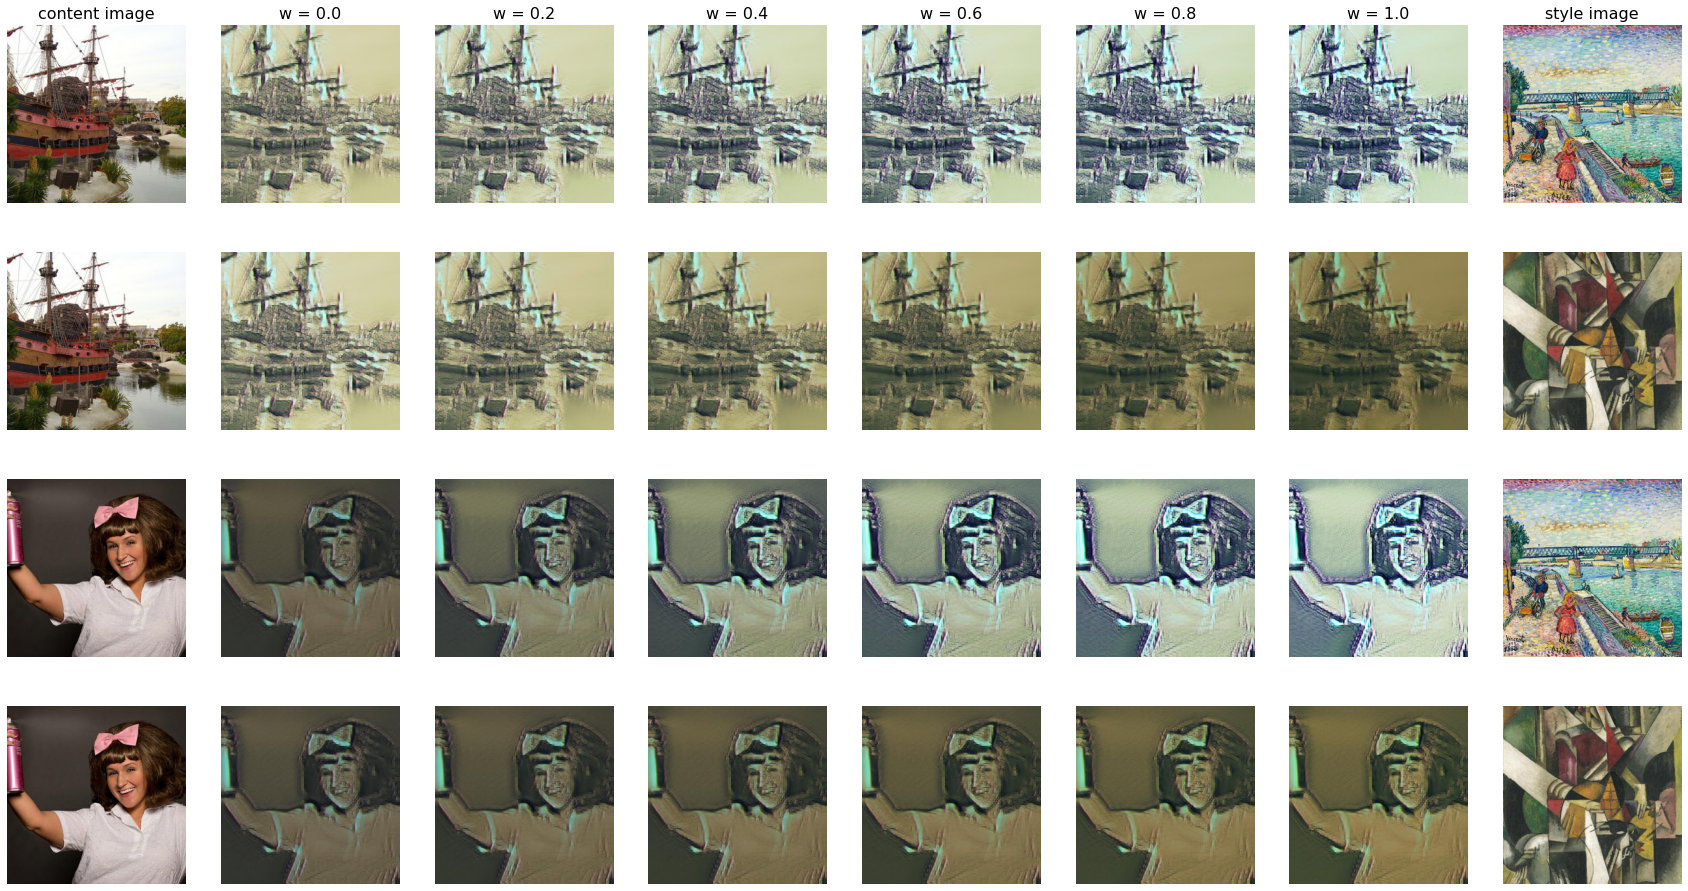

In [ ]:
print_weight_result(path = '/content/output/')